# Data Analysis Task 3

## Learning Objectives

In this lesson, we will:

- "Use a library function to get a list of filenames that match a wildcard pattern."
- "Write a `for` loop to process multiple files."

## Key points

- "Use `glob.glob(pattern)` to create a list of files whose names match a pattern."
- "Use `*` in a pattern to match zero or more characters, and `?` to match any single character."

## Processing multiple files

As a final piece to processing our inflammation data, we need a way to get a list of all the files
in our `data` directory whose names start with `inflammation-` and end with `.csv`.
The following library will help us to achieve this:

In [1]:
import glob 

The `glob` library contains a function, also called `glob`, that finds files and directories whose names match a pattern. We provide those patterns as strings: the character `*` matches zero or more characters, while `?` matches any one character. We can use this to get the names of all the CSV files in the current directory:

In [2]:
print(glob.glob('data/inflammation*.csv'))

['data/inflammation-05.csv', 'data/inflammation-11.csv', 'data/inflammation-10.csv', 'data/inflammation-04.csv', 'data/inflammation-12.csv', 'data/inflammation-06.csv', 'data/inflammation-07.csv', 'data/inflammation-03.csv', 'data/inflammation-02.csv', 'data/inflammation-01.csv', 'data/inflammation-09.csv', 'data/inflammation-08.csv']


As these examples show, `glob.glob`'s result is a list of file and directory paths in arbitrary order. This means we can loop over it to do something with each filename in turn. In our case, the "something" we want to do is generate a set of plots for each file in our inflammation dataset.

If we want to start by analyzing just the first three files in alphabetical order, we can use the `sorted` built-in function to generate a new sorted list from the `glob.glob` output:

data/inflammation-01.csv


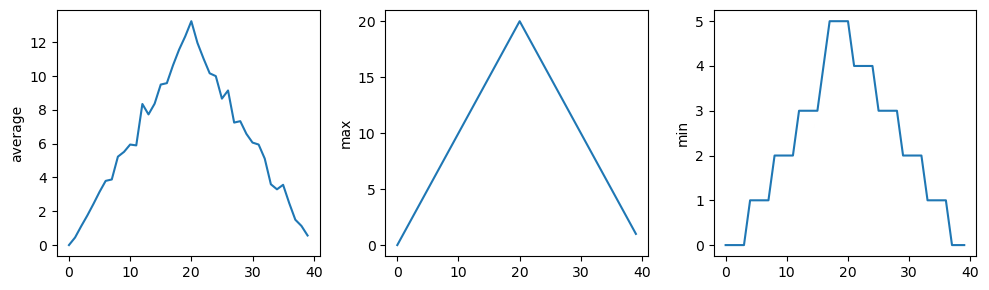

data/inflammation-02.csv


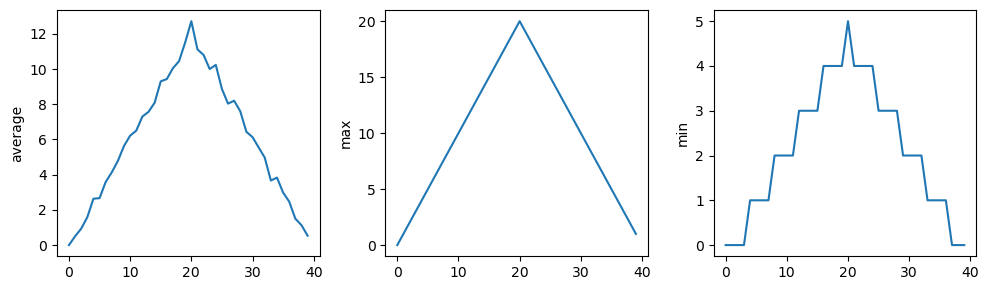

data/inflammation-03.csv


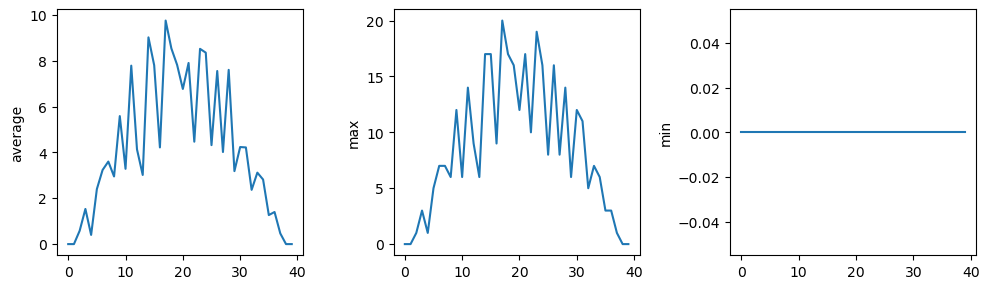

In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt

filenames = sorted(glob.glob('data/inflammation*.csv'))
filenames = filenames[0:3]
for filename in filenames:
    print(filename)

    data = np.loadtxt(fname=filename, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(np.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(np.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(np.min(data, axis=0))

    fig.tight_layout()
    plt.show()

![Three side-by-side line plots showing average, maximum, and minimum inflammation values over 40 days. The first plot shows a fluctuating average peaking around day 20. The second plot displays a symmetrical triangle shape for the maximum values. The third plot shows a step-like pattern for the minimum values, also peaking near day 20. All lines are blue.](
images/03-loop_49_1.png)

![Three-panel line plot displaying average, maximum, and minimum inflammation levels across 40 days. The average panel shows a smooth rise and fall peaking around day 20 with slight variation. The maximum panel features a symmetrical triangle peak at day 20. The minimum panel displays a stepped pattern with a peak at day 20. All plots use blue lines.](images/03-loop_49_3.png)

![Three line plots showing average, maximum, and minimum inflammation values across 40 days. The average and maximum plots exhibit irregular, jagged patterns with peaks around day 20. The minimum plot is a flat line at zero, indicating no recorded inflammation values below that threshold for any day. All lines are blue.](images/03-loop_49_5.png)

The plots generated for the second clinical trial file look very similar to the plots for the first file: their average plots show similar "noisy" rises and falls; their maxima plots show exactly the same linear rise and fall; and their minima plots show similar staircase structures.

The third dataset shows much noisier average and maxima plots that are far less suspicious than the first two datasets, however the minima plot shows that the third dataset minima is consistently zero across every day of the trial. If we produce a heat map for the third data file we see the following:

![eatmap visualization of inflammation data using Matplotlib's imshow, representing values across patients (rows) and days (columns). The plot shows distinct vertical stripes, indicating a regular alternating pattern in inflammation levels over time. Color intensity corresponds to inflammation magnitude.](images/inflammation-03-imshow.svg)

We can see that there are zero values sporadically distributed across all patients and days of the clinical trial, suggesting that there were potential issues with data collection throughout the trial. In addition, we can see that the last patient in the study didn't have any inflammation flare-ups at all throughout the trial, suggesting that they may not even suffer from arthritis!


## Plotting Differences
Plot the difference between the average inflammations reported in the first and second datasets (stored in `inflammation-01.csv` and `inflammation-02.csv`, correspondingly), i.e., the difference between the leftmost plots of the first two figures.

```{admonition} Solution
:class: dropdown
```python
import glob
import numpy as np
import matplotlib.pyplot as plt
filenames = sorted(glob.glob('data/inflammation*.csv'))
data0 = np.loadtxt(fname=filenames[0], delimiter=',')
data1 = np.loadtxt(fname=filenames[1], delimiter=',')
fig = plt.figure(figsize=(10.0, 3.0))
plt.ylabel('Difference in average')
plt.plot(np.mean(data0, axis=0) - np.mean(data1, axis=0))
fig.tight_layout()
plt.show()
```
```

## Generate Composite Statistics
Use each of the files once to generate a dataset containing values averaged over all patients:

In [4]:
import glob
import numpy as np

# Get all filenames matching the pattern
filenames = glob.glob('data/inflammation*.csv')

# Initialize composite_data with the right shape
composite_data = np.zeros((60, 40))

# Loop over each file and add its data
for filename in filenames:
    data = np.loadtxt(filename, delimiter=',')
    composite_data += data

# Average over the number of files
composite_data = composite_data / len(filenames)

Then use pyplot to generate average, max, and min for all patients.

```{admonition} Solution
:class: dropdown
```python
import glob
import numpy as np
import matplotlib.pyplot as plt
filenames = glob.glob('data/inflammation*.csv')
composite_data = np.zeros((60,40))
for filename in filenames:
    data = np.loadtxt(fname = filename, delimiter=',')
    composite_data = composite_data + data
    composite_data = composite_data / len(filenames)
    fig = plt.figure(figsize=(10.0, 3.0))
    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    axes1.set_ylabel('average')
    axes1.plot(np.mean(composite_data, axis=0))
    axes2.set_ylabel('max')
    axes2.plot(np.max(composite_data, axis=0))
    axes3.set_ylabel('min')
    axes3.plot(np.min(composite_data, axis=0))
    fig.tight_layout()
    plt.show()
```
```



## Conclusions

After spending some time investigating the heat map and statistical plots, as well as
doing the above exercises to plot differences between datasets and to generate composite
patient statistics, we gain some insight into the twelve clinical trial datasets.

The datasets appear to fall into two categories:

* seemingly "ideal" datasets that agree excellently with Dr. Maverick's claims,
  but display suspicious maxima and minima (such as `inflammation-01.csv` and `inflammation-02.csv`)
* "noisy" datasets that somewhat agree with Dr. Maverick's claims, but show concerning
  data collection issues such as sporadic missing values and even an unsuitable candidate
  making it into the clinical trial.

In fact, it appears that all three of the "noisy" datasets (`inflammation-03.csv`,
`inflammation-08.csv`, and `inflammation-11.csv`) are identical down to the last value.
Armed with this information, we confront Dr. Maverick about the suspicious data and
duplicated files.

Dr. Maverick confesses that they fabricated the clinical data after they found out
that the initial trial suffered from a number of issues, including unreliable data-recording and
poor participant selection. They created fake data to prove their drug worked, and when we asked
for more data they tried to generate more fake datasets, as well as throwing in the original
poor-quality dataset a few times to try and make all the trials seem a bit more "realistic".

Congratulations! We've investigated the inflammation data and proven that the datasets have been
synthetically generated.

But it would be a shame to throw away the synthetic datasets that have taught us so much
already, so we'll forgive the imaginary Dr. Maverick and continue to use the data to learn
how to program.
